In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import math
import time
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist/", one_hot=True)
num_train=mnist.train.num_examples
num_val=mnist.validation.num_examples
num_test=mnist.test.num_examples

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [2]:
from models.CNN import CNN
from models.SRAM import SRAM
from models.RAM import RAM

In [3]:
batch_size=64
tf.reset_default_graph()
# model=CNN()
model=RAM()
loss,accuracy=model()
# model=RAM()

In [4]:
def eval(dataset,num_iteration):
    total_loss=0
    total_accuracy=0
    for it in range(num_iteration):
        images,labels=dataset.next_batch(batch_size)
        # no Monte Carlo test during evaludation step
        feed_dict={model.X:images.reshape(-1,28,28,1),model.y:labels}
        loss_num,accuracy_num = sess.run([loss,accuracy],feed_dict=feed_dict)
        total_loss+=loss_num
        total_accuracy+=accuracy_num
    total_loss/=num_iteration
    total_accuracy/=num_iteration
    return total_loss,total_accuracy

In [5]:
saver=tf.train.Saver()
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    saver.restore(sess, "models/parameters/RAM/RAM.ckpt")
    _,acc_train=eval(mnist.train,num_train//batch_size)
    _,acc_val=eval(mnist.validation,num_val//batch_size)
    _,acc_test=eval(mnist.test,num_test//batch_size)
    print('Accuracy on training set is %.3f%%' % (acc_train*100.0))
    print('Accuracy on validation set is %.3f%%' % (acc_val*100.0))
    print('Accuracy on testing set is %.3f%%' % (acc_test*100.0))

INFO:tensorflow:Restoring parameters from models/parameters/RAM/RAM.ckpt
Accuracy on training set is 96.955%
Accuracy on validation set is 96.695%
Accuracy on testing set is 96.454%


# soft-attention model demo

In [ ]:
# saver=tf.train.Saver()
# with tf.Session() as sess:
#     saver.restore(sess, "models/parameters/SRAM/SRAM.ckpt")
#     num_batch=10
#     images,labels=mnist.test.next_batch(num_batch)
#     accuracy_num,mask_his=sess.run([accuracy,model.mask_his],feed_dict={model.X:images,model.y:labels})
#     print(accuracy_num)
#     for im_id in range(num_batch):
#         img=images[im_id,:].reshape(28,28)
# #         plt.subplot('131')
#         plt.imshow(img,cmap='RdBu_r')
#         plt.title('original img')
#         plt.show()
        
#         m_his=[]
#         for t in range(10):
#             mask=mask_his[t][im_id,:].reshape(28,28)
#             mask=np.pad(mask,pad_width=1,mode='constant',constant_values=0)
#             m_his.append(mask)
#         st=np.hstack(m_his)
        
# #         plt.subplot('132')
#         plt.imshow(st,cmap='gray')
#         plt.show()
        
# #         plt.subplot('133')
#         plt.imshow((mask_his[-1][im_id,:].reshape(28,28)*img),cmap='RdBu_r')
#         plt.show()

# hard-attention demo

INFO:tensorflow:Restoring parameters from models/parameters/RAM/RAM.ckpt
accuracy = 1.0


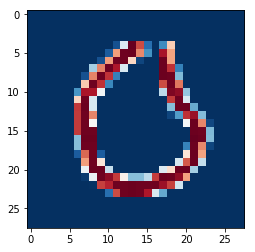

glimpse 1
pos: [0.1986773  0.16032815]
normalized pos: [17. 16.]


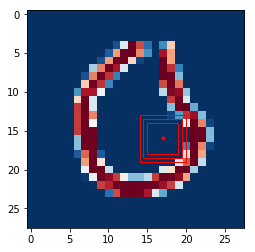

glimpse 2
pos: [-0.00138231 -0.0763755 ]
normalized pos: [14. 13.]


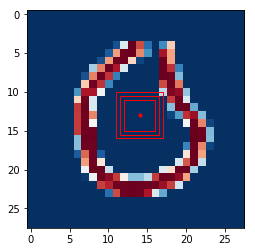

glimpse 3
pos: [-0.35908115 -0.06889252]
normalized pos: [ 9. 13.]


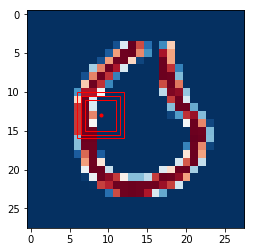

glimpse 4
pos: [0.6410283 0.169515 ]
normalized pos: [23. 16.]


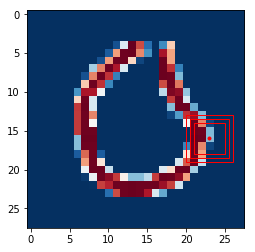

glimpse 5
pos: [0.04739822 0.2272711 ]
normalized pos: [15. 17.]


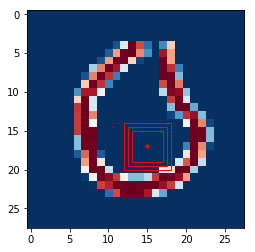

glimpse 6
pos: [-0.05482357 -0.04499189]
normalized pos: [13. 13.]


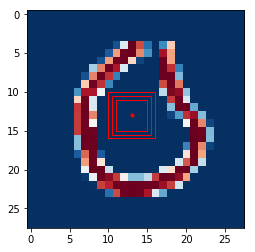

glimpse 7
pos: [-0.11573762 -0.29826024]
normalized pos: [12. 10.]


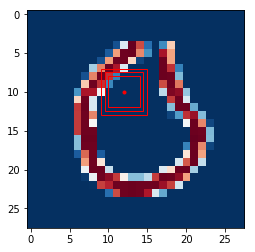

glimpse 8
pos: [0.17417014 0.43001664]
normalized pos: [16. 20.]


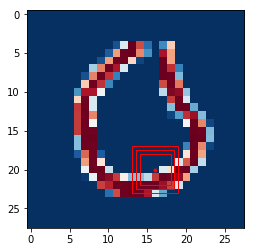

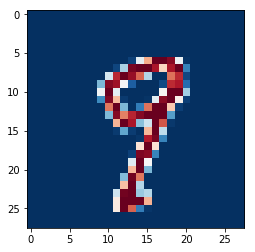

glimpse 1
pos: [-0.96673703 -0.7699585 ]
normalized pos: [0. 3.]


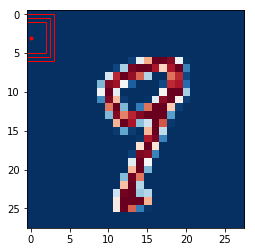

glimpse 2
pos: [-0.14848633  0.60840404]
normalized pos: [12. 23.]


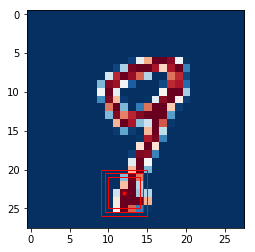

glimpse 3
pos: [0.16719554 0.42844158]
normalized pos: [16. 20.]


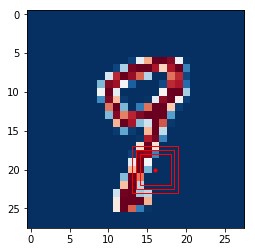

glimpse 4
pos: [ 0.06984194 -0.20327935]
normalized pos: [15. 11.]


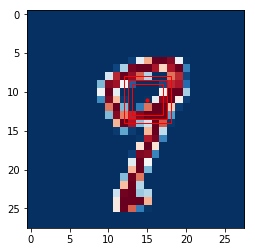

glimpse 5
pos: [-0.5633634  -0.16578795]
normalized pos: [ 6. 12.]


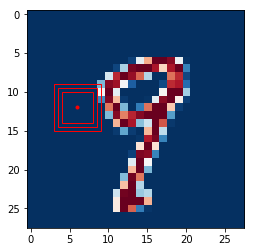

glimpse 6
pos: [-0.52257025 -0.16835769]
normalized pos: [ 7. 12.]


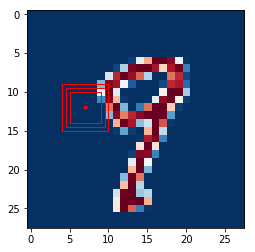

glimpse 7
pos: [-0.4728745 -0.8448515]
normalized pos: [7. 2.]


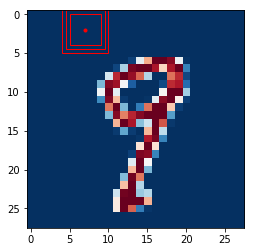

glimpse 8
pos: [-0.2789253   0.02669412]
normalized pos: [10. 14.]


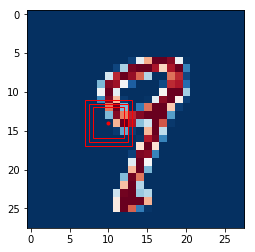

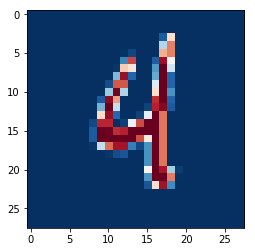

glimpse 1
pos: [ 0.74318504 -0.49345112]
normalized pos: [24.  7.]


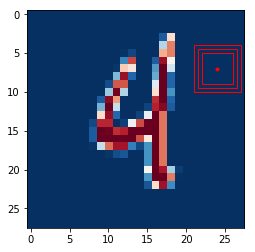

glimpse 2
pos: [-0.275392    0.40133762]
normalized pos: [10. 20.]


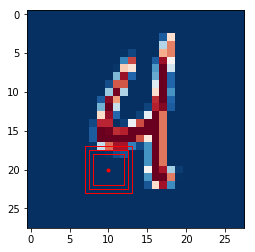

glimpse 3
pos: [-0.02045854  0.174951  ]
normalized pos: [14. 16.]


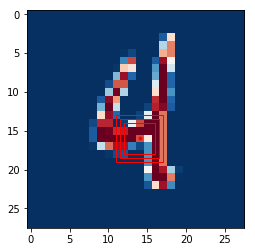

glimpse 4
pos: [-0.27397862  0.03995683]
normalized pos: [10. 15.]


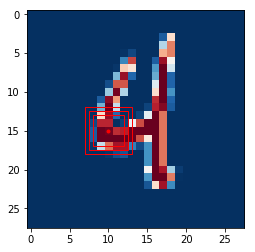

glimpse 5
pos: [-0.12251265  0.23517503]
normalized pos: [12. 17.]


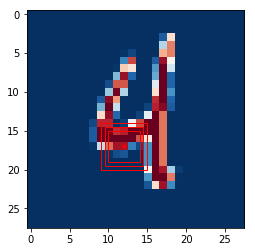

glimpse 6
pos: [ 0.0647617 -0.703771 ]
normalized pos: [15.  4.]


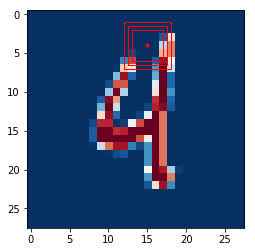

glimpse 7
pos: [-0.00115085  0.21991234]
normalized pos: [14. 17.]


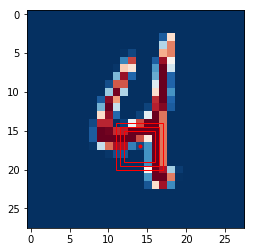

glimpse 8
pos: [-0.05548053 -0.25799823]
normalized pos: [13. 10.]


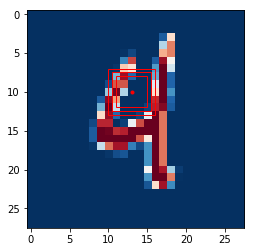

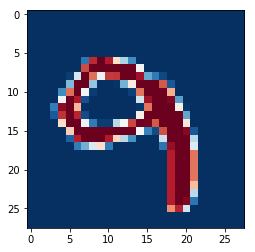

glimpse 1
pos: [0.98620296 0.07476544]
normalized pos: [28. 15.]


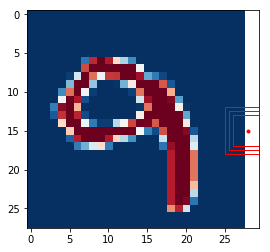

glimpse 2
pos: [0.50738883 0.12716952]
normalized pos: [21. 16.]


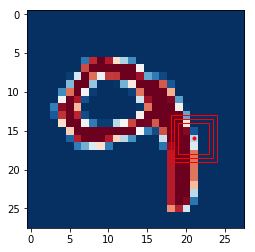

glimpse 3
pos: [0.03925933 0.6302215 ]
normalized pos: [15. 23.]


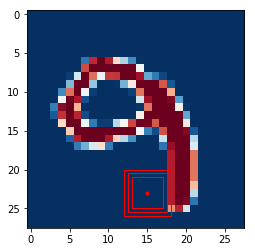

glimpse 4
pos: [-0.11209012  0.67199695]
normalized pos: [12. 23.]


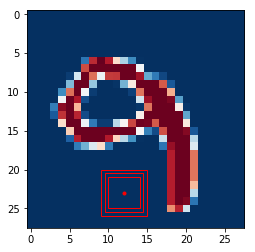

glimpse 5
pos: [0.3793307  0.02842757]
normalized pos: [19. 14.]


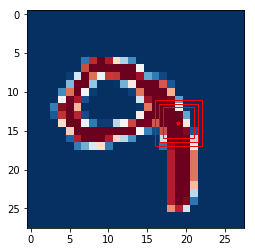

glimpse 6
pos: [-0.0680372 -0.501109 ]
normalized pos: [13.  7.]


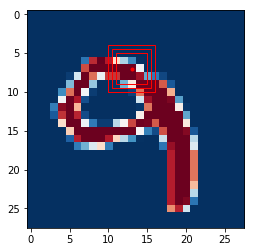

glimpse 7
pos: [ 0.08980151 -0.534845  ]
normalized pos: [15.  7.]


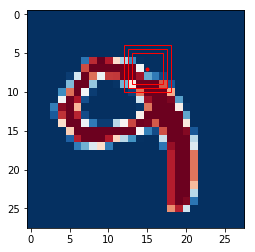

glimpse 8
pos: [-0.44586197  0.65399027]
normalized pos: [ 8. 23.]


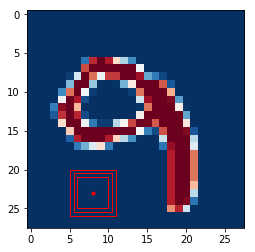

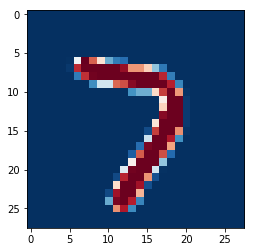

glimpse 1
pos: [-0.5689542   0.46536827]
normalized pos: [ 6. 21.]


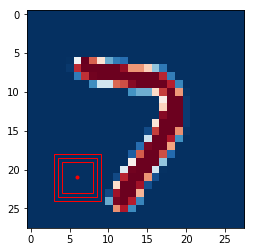

glimpse 2
pos: [-0.4973248  -0.66965544]
normalized pos: [7. 5.]


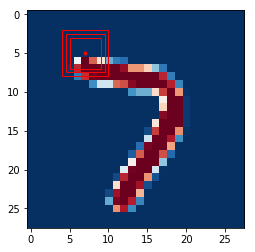

glimpse 3
pos: [-0.17065889 -0.5013775 ]
normalized pos: [12.  7.]


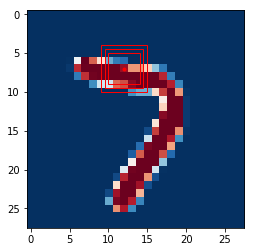

glimpse 4
pos: [-0.82396615  0.15805261]
normalized pos: [ 2. 16.]


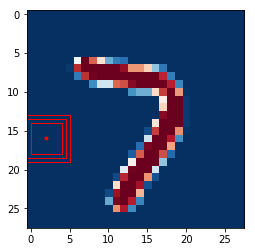

glimpse 5
pos: [ 0.71445596 -0.02863683]
normalized pos: [24. 14.]


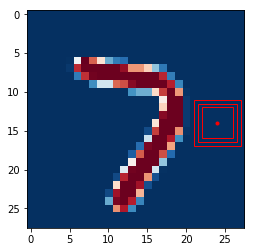

glimpse 6
pos: [0.69734496 0.6291242 ]
normalized pos: [24. 23.]


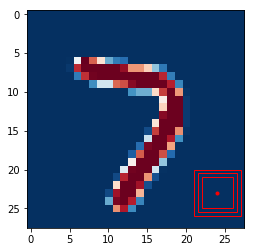

glimpse 7
pos: [0.02200067 0.612008  ]
normalized pos: [14. 23.]


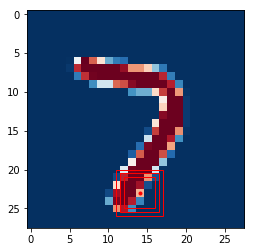

glimpse 8
pos: [-0.53386986  0.39722958]
normalized pos: [ 7. 20.]


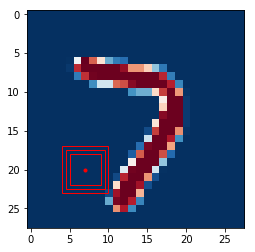

In [8]:
def draw(img_id,g_id,img,pos):
    fig = plt.figure(1)
    ax = fig.add_subplot(111, aspect='equal')
    plt.imshow(img,cmap='RdBu_r')
    pos=np.around((pos+1)*14)
    lx=pos[0]
    ly=pos[1]
    plt.plot(lx,ly,'r.')
    rect1 = patches.Rectangle((lx-2,ly-2),4,4,linewidth=1,edgecolor='r',facecolor='none')
    rect2 = patches.Rectangle((lx-2.5,ly-2.5),5,5,linewidth=1,edgecolor='r',facecolor='none')
    rect3 = patches.Rectangle((lx-3,ly-3),6,6,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
#     plt.savefig('glimpse_im%d_gl%d.png' % (img_id,g_id))
    plt.show()
    
def translate(image):
    canvas=np.zeros((56,56))
    out_canvas=np.zeros((28,28))
    canvas[:28,:28]=image
    for i in range(28):
        for j in range(28):
            out_canvas[i,j]=np.max(canvas[2*i:2*i+2,2*j:2*j+2])
    return out_canvas
    

saver=tf.train.Saver()
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    saver.restore(sess, "models/parameters/RAM/RAM.ckpt")
    num_batch=5
    images,labels=mnist.test.next_batch(num_batch)
#     new_image=np.zeros((num_batch,28,28))
#     for i in range(num_batch):
#         new_image[i,...]=translate(images[i,:].reshape(28,28))
    feed_dict={model.X:images.reshape(-1,28,28,1),model.y:labels}
    acc_num,loc_his=sess.run([accuracy,model.loc_his],feed_dict=feed_dict)
    print('accuracy =',acc_num)
    for im_id in range(num_batch):
        plt.imshow(images[im_id,...].reshape(28,28),cmap='RdBu_r')
        plt.show()
        for gl in range(8):
            print('glimpse',gl+1)
            print('pos:',loc_his[gl][im_id,:])
            print('normalized pos:',np.around((loc_his[gl][im_id,:]+1)*14))
            draw(im_id,gl,images[im_id,...].reshape(28,28),loc_his[gl][im_id,:])